In [2]:
from constants import *
from TwoQubits import *
from TwoQubitGates import *
from helper_functions_2Qubits import *
from QuantumFourierTransform import *

In [3]:
vec1 = np.matrix([0.5,0.5,0])
vec2 = np.matrix([1,0,0])
density1 = vec1.H*vec1
density2 = vec2.H*vec2
two_qudit_density = np.kron(density1, density2)

In [4]:
# define qubits q1 and q2
print(two_qudit_density)

[[0.25 0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [5]:
#leaked_noisy_QFT_circuit(two_qudit_density)

In [6]:
#get_qudit_gate_from_list(two_qudit_density, 1, 0.1)

In [18]:
qudit_dim = 3
error_mats = []
for x1 in range(5):
    for y1 in range(5):
        for z1 in range(5):
            print(x1, y1, z1)
            for x2 in range(5):
                for y2 in range(5):
                    for z2 in range(5):
                        if (x1+y1+z1)!=0 and (x2+y2+z2!=0):
                            scale1 = 1/np.sqrt(x1**2+y1**2+z1**2)
                            scale2 = 1/np.sqrt(x2**2+y2**2+z2**2)
                            qq = TwoQubits([scale1*x1,scale1*y1,scale1*z1],[scale2*x2,scale2*y2,scale2*z2])
                            ideal_case = ideal_QFT_circuit(qq.coef_matrix)
                            ideal_case = get_rho_from_Pauli_basis(ideal_case)
                            ideal_qudit = np.asmatrix(np.zeros((qudit_dim**2,qudit_dim**2), dtype=complex))
                            ideal_qudit[0,0] = ideal_case[0,0]
                            ideal_qudit[0,1] = ideal_case[0,1]
                            ideal_qudit[1,0] = ideal_case[1,0]
                            ideal_qudit[1,1] = ideal_case[1,1]
                            ideal_qudit[0,qudit_dim] = ideal_case[0,2]
                            ideal_qudit[0,qudit_dim+1] = ideal_case[0,3]
                            ideal_qudit[qudit_dim,0] = ideal_case[2,0]
                            ideal_qudit[qudit_dim+1,0] = ideal_case[3,0]
                            ideal_qudit[1,qudit_dim] = ideal_case[1,2]
                            ideal_qudit[1,qudit_dim+1] = ideal_case[1,3]
                            ideal_qudit[qudit_dim,1] = ideal_case[2,1]
                            ideal_qudit[qudit_dim+1,1] = ideal_case[3,1]
                            ideal_qudit[qudit_dim,qudit_dim] = ideal_case[2,2]
                            ideal_qudit[qudit_dim,qudit_dim+1] = ideal_case[2,3]
                            ideal_qudit[qudit_dim+1,qudit_dim] = ideal_case[3,2]
                            ideal_qudit[qudit_dim+1,qudit_dim+1] = ideal_case[3,3]
                            for i in range(100):
                                start_qudit = qq.get_matrix()
                                two_qudit_density = np.asmatrix(np.zeros((qudit_dim**2,qudit_dim**2), dtype=complex))
                                two_qudit_density[0,0] = start_qudit[0,0]
                                two_qudit_density[0,1] = start_qudit[0,1]
                                two_qudit_density[1,0] = start_qudit[1,0]
                                two_qudit_density[1,1] = start_qudit[1,1]
                                two_qudit_density[0,qudit_dim] = start_qudit[0,2]
                                two_qudit_density[0,qudit_dim+1] = start_qudit[0,3]
                                two_qudit_density[qudit_dim,0] = start_qudit[2,0]
                                two_qudit_density[qudit_dim+1,0] = start_qudit[3,0]
                                two_qudit_density[1,qudit_dim] = start_qudit[1,2]
                                two_qudit_density[1,qudit_dim+1] = start_qudit[1,3]
                                two_qudit_density[qudit_dim,1] = start_qudit[2,1]
                                two_qudit_density[qudit_dim+1,1] = start_qudit[3,1]
                                two_qudit_density[qudit_dim,qudit_dim] = start_qudit[2,2]
                                two_qudit_density[qudit_dim,qudit_dim+1] = start_qudit[2,3]
                                two_qudit_density[qudit_dim+1,qudit_dim] = start_qudit[3,2]
                                two_qudit_density[qudit_dim+1,qudit_dim+1] = start_qudit[3,3]
                                noisy_case = leaked_noisy_QFT_circuit(two_qudit_density, 200+x1-y2+y1*z1*x2+z2+i, 27261549*i)
                                error_mats.append(noisy_case-ideal_qudit)
error_mats = np.array(error_mats)
print(np.average(np.average(error_mats, axis=0)), np.max(error_mats))
    

0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 1 0
0 1 1
0 1 2
0 1 3
0 1 4
0 2 0
0 2 1
0 2 2
0 2 3
0 2 4
0 3 0
0 3 1
0 3 2
0 3 3
0 3 4
0 4 0
0 4 1
0 4 2
0 4 3
0 4 4
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 1 0
1 1 1
1 1 2
1 1 3
1 1 4
1 2 0
1 2 1
1 2 2
1 2 3
1 2 4
1 3 0
1 3 1
1 3 2
1 3 3
1 3 4
1 4 0
1 4 1
1 4 2
1 4 3
1 4 4
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
2 1 0
2 1 1
2 1 2
2 1 3
2 1 4
2 2 0
2 2 1
2 2 2
2 2 3
2 2 4
2 3 0
2 3 1
2 3 2
2 3 3
2 3 4
2 4 0
2 4 1
2 4 2
2 4 3
2 4 4
3 0 0
3 0 1
3 0 2
3 0 3
3 0 4
3 1 0
3 1 1
3 1 2
3 1 3
3 1 4
3 2 0
3 2 1
3 2 2
3 2 3
3 2 4
3 3 0
3 3 1
3 3 2
3 3 3
3 3 4
3 4 0
3 4 1
3 4 2
3 4 3
3 4 4
4 0 0
4 0 1
4 0 2
4 0 3
4 0 4
4 1 0
4 1 1
4 1 2
4 1 3
4 1 4
4 2 0
4 2 1
4 2 2
4 2 3
4 2 4
4 3 0
4 3 1
4 3 2
4 3 3
4 3 4
4 4 0
4 4 1
4 4 2
4 4 3
4 4 4
(0.0005744267473547173-8.13820889964428e-19j) (7.352622234929206+0j)


In [19]:
#(0.16406368989226933+6.938893903907228e-18j) (14.99825480095495-1.90604437716577e-20j)
avg_mat = np.average(error_mats, axis=0)

In [20]:
avg_mat

array([[ 1.75556855e-01-4.07644548e-20j, -4.48274635e-02-5.34512116e-02j,
         2.14034977e-04-1.61353079e-04j, -1.66047428e-01-3.73132728e-02j,
        -6.75547884e-02-2.36075151e-01j, -1.37878293e-04+1.65156302e-04j,
         5.99074373e-05+8.73074902e-05j, -3.84040194e-05+2.76377976e-04j,
         2.65206104e-07-3.22902361e-05j],
       [-4.48274635e-02+5.34512116e-02j,  2.61558298e-01+1.79379953e-20j,
         1.14398297e-04-4.03021264e-04j,  2.51323022e-02+3.50827413e-02j,
        -2.74057991e-02-6.62142907e-02j, -1.79954549e-04+2.74535131e-04j,
         3.64326843e-05+1.62121024e-05j, -5.31988050e-06+2.58183876e-04j,
        -7.91622632e-05-3.52362070e-05j],
       [ 2.14034977e-04+1.61353079e-04j,  1.14398297e-04+4.03021264e-04j,
         2.35596900e-03+2.48249641e-23j,  1.07196544e-04-7.26436296e-04j,
         3.87833558e-04-4.94336621e-04j,  1.20059909e-04+7.00687129e-05j,
         3.43336894e-05-8.69991605e-05j, -1.02753097e-04+1.93701212e-04j,
         2.59293206e-05-2.45

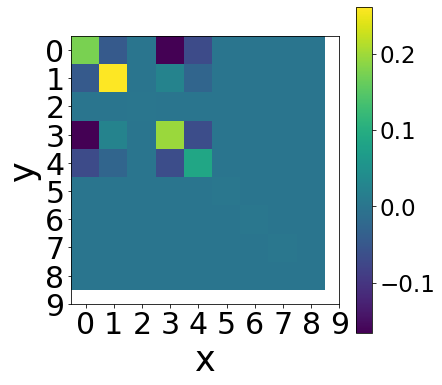

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.imshow(np.real(avg_mat))
plt.colorbar(orientation='vertical').ax.tick_params(labelsize=23)
plt.ylabel('y',fontsize=35)
plt.xlabel('x',fontsize=35)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],fontsize=30)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],fontsize=30)
plt.show()

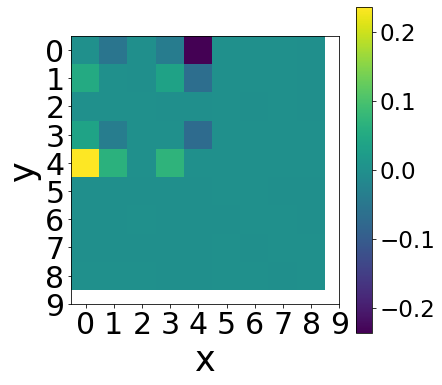

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.imshow(np.imag(avg_mat))
plt.colorbar(orientation='vertical').ax.tick_params(labelsize=23)
plt.ylabel('y',fontsize=35)
plt.xlabel('x',fontsize=35)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],fontsize=30)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],fontsize=30)
plt.show()